In [8]:
!pip install pandas.compat
!pip install pandas_montecarlo
!pip install pandas.datareader


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


  Using cached https://files.pythonhosted.org/packages/22/f1/a02eea03628865c3d4c29849cda8c8a73f43358048aee47d79dfbfa6c6c3/pandas_datareader-0.9.0-py3-none-any.whl


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [27]:
import pandas_datareader.data as web
import datetime

f = web.DataReader('USD000UTSTOM', 'moex', start='2017-01-01', end='2019-12-01')
f.tail()

,BOARDID,CLOSE,HIGH,LOW,NUMTRADES,OPEN,SECID,SHORTNAME,VOLRUR,WAPRICE
TRADEDATE,,,,,,,,,,
2019-11-28,CNGD,64.0675,64.1924,63.9075,4431,64.0000,USD000UTSTOM,USDRUB_TOM,4.497012e+09,NaN
2019-11-28,LICU,0.0000,0.0000,0.0000,0,0.0000,USD000UTSTOM,USDRUB_TOM,0.000000e+00,NaN
2019-11-29,CETS,64.3175,64.3475,64.0025,22001,64.0975,USD000UTSTOM,USDRUB_TOM,1.174056e+11,64.1702
2019-11-29,CNGD,64.3150,65.5223,62.7984,11484,64.0800,USD000UTSTOM,USDRUB_TOM,5.925871e+10,NaN
2019-11-29,LICU,0.0000,0.0000,0.0000,0,0.0000,USD000UTSTOM,USDRUB_TOM,0.000000e+00,NaN


In [28]:
data_OC = f.filter(regex = '(OPEN|CLOSE)')
data_OC['return'] = data_OC['OPEN']-data_OC['CLOSE']
data_OC.head()

<ipython-input-28-f45189ff9896>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,CLOSE,OPEN,return
TRADEDATE,,,
2017-01-03,60.9025,61.1000,0.1975
2017-01-03,60.6225,61.1500,0.5275
2017-01-04,60.4600,60.9375,0.4775
2017-01-04,60.3225,61.2200,0.8975
2017-01-05,59.4500,60.1975,0.7475


In [31]:
import pandas_montecarlo
lower_bound = -0.2
upper_bound = 0.05
bust_values = [-0.1, 0.04, 0.0, -0.132, 0.023, 0.026, -0.08, -0.15, 0.02, -0.072]
simulations = []
n_simulations = 10
sims_v = 11
index = 0
mc = data_OC['return'].montecarlo(sims=10, bust=-0.5, goal=0.1)
for i in range(0, n_simulations):
    simulations.append(data_OC['return'].montecarlo(sims=10, bust=bust_values[i], goal=0.1))

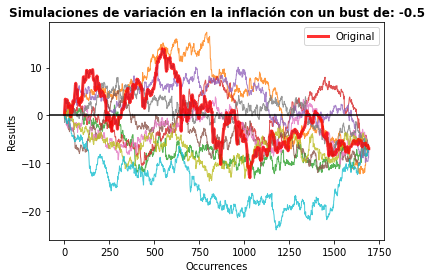

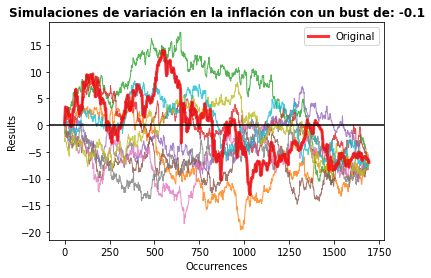

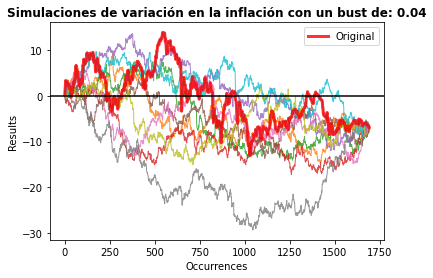

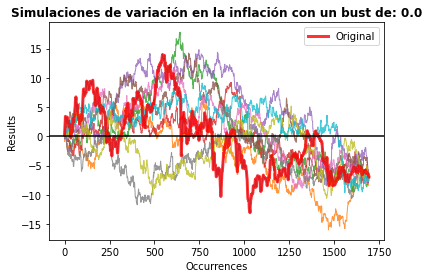

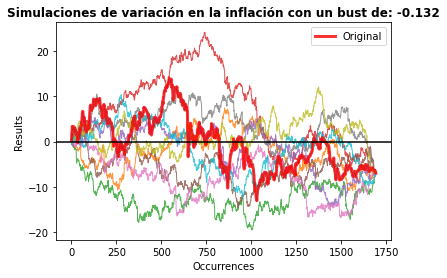

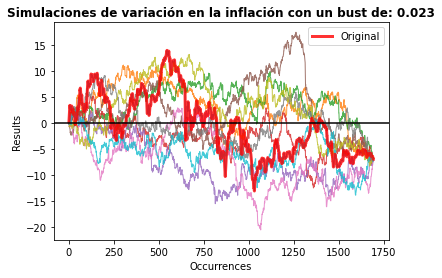

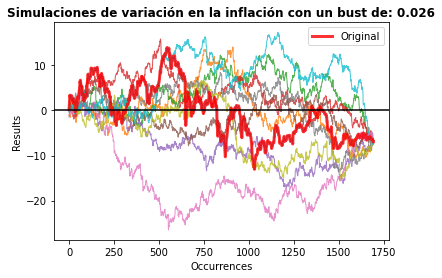

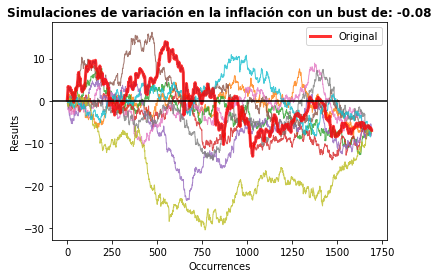

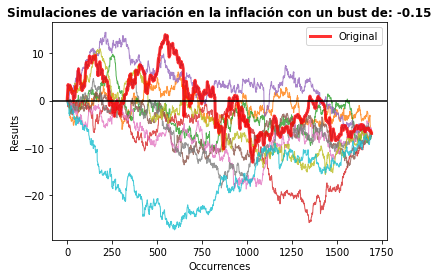

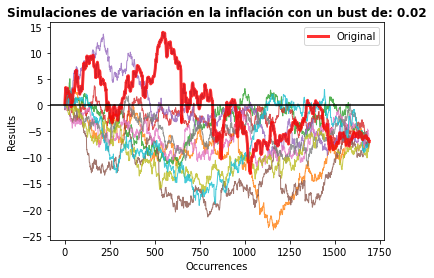

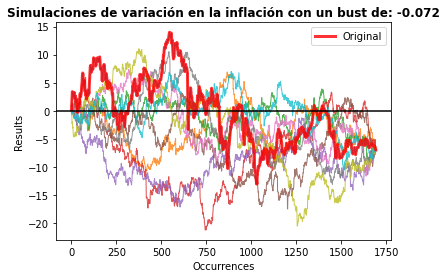

In [32]:
import plotly.graph_objects as go
mc.plot(title="Simulaciones de variación en la inflación con un bust de: " + str(-0.5))
index = 0
for simulation in simulations:
    simulation.plot(title="Simulaciones de variación en la inflación con un bust de: " + str(bust_values[index]))
    table = go.Figure(data=[go.Table(header=dict(values=['Medidas', 'Valores']),
                 cells=dict(values=[['Minimo', 'Maximo', 'Media', 'Mediana', 'Desviación Estandar', 'Reducción Máxima'],
                                    [simulation.stats['min'], simulation.stats['max'], simulation.stats['mean'],
                                     simulation.stats['median'], simulation.stats['std'], simulation.stats['maxdd']]]))
                     ])
    table.show()
    index += 1